# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane have the lowest mean and median tumor volumes, also lowest SEM values compare to the other drugs in this data set. Both of these drugs effectiveness to reducing the tumor size less than others in the data set. As shown in the pie plot, there are slightly more male mice than female mice, it is only a 2% higher. Mouse ID s185 under Capomulin treatment, tumor volume decreased through out except day 15, it increased slightly. The correlation between mouse weight and the average tumor volume is 0.84, which shows a positive correlation between them, as the mouse weight increases, the average tumor volume tends to increase as well.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
merged_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_miceID = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

duplicate_miceID

array(['g989'], dtype=object)

In [4]:
mouse_df = pd.DataFrame(merged_df, columns=["Mouse ID", "Timepoint"])
duplicatedM = mouse_df[mouse_df.duplicated()]
duplicatedM

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mousedata = merged_df.loc[merged_df["Mouse ID"] == "g989", :]
duplicate_mousedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = merged_df.loc[merged_df["Mouse ID"] != "g989", :]
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_data_df["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen = merged_df.groupby("Drug Regimen")

regimen_mean = regimen["Tumor Volume (mm3)"].mean()
regimen_median = regimen['Tumor Volume (mm3)'].median()
regimen_variance = regimen['Tumor Volume (mm3)'].var()
regimen_stand = regimen['Tumor Volume (mm3)'].std()
regimen_sem = regimen['Tumor Volume (mm3)'].sem()

summary = pd.DataFrame({
    "Mean": regimen_mean,
    "Median": regimen_median,
    "Variance": regimen_variance,
    "Standard Deviation": regimen_stand,
    "SEM": regimen_sem
})

summary



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumorsummarybyregimen = regimen["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std' , 'sem'])

tumorsummarybyregimen

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

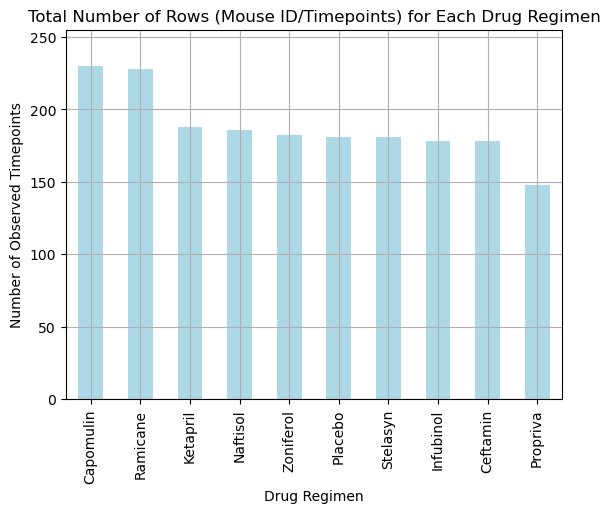

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = clean_data_df['Drug Regimen'].value_counts()
drug_regimen_counts.plot.bar(color="lightblue")
plt.ylim(0, max(drug_regimen_counts)+25)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Timepoints')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.grid()
plt.show()

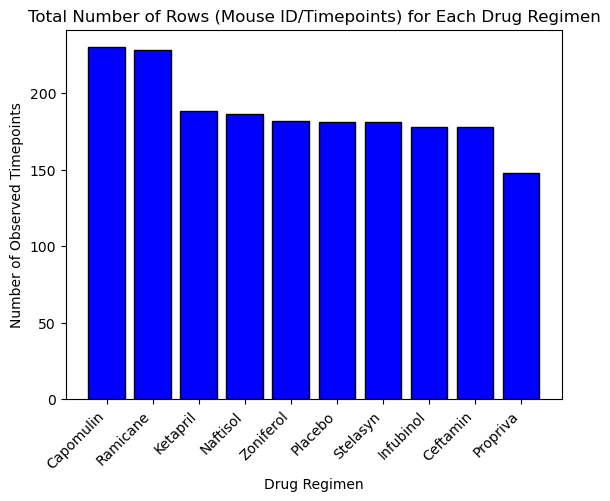

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_regimen_counts = clean_data_df['Drug Regimen'].value_counts()
plt.bar(drug_regimen_counts.index, drug_regimen_counts, color='blue', edgecolor='black')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Timepoints')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xticks(rotation=45, ha='right')
plt.show()

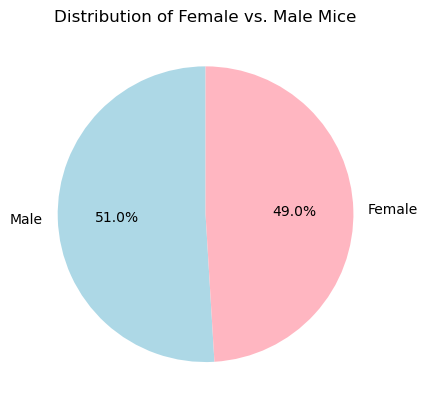

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

micegenders = clean_data_df['Sex'].value_counts()
micegenders.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightpink'],startangle=90)
plt.ylabel("")
plt.title('Distribution of Female vs. Male Mice')
plt.show()

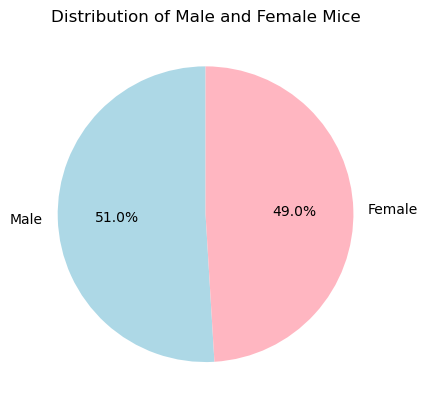

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
micegenders = clean_data_df['Sex'].value_counts()
plt.pie(micegenders, labels=micegenders.index, autopct="%1.1f%%", colors=["lightblue", "lightpink"], startangle=90)
plt.title("Distribution of Male and Female Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volume = clean_data_df[clean_data_df["Drug Regimen"].isin(treatments)]

# Start by getting the last (greatest) timepoint for each mouse
Greatest_timepoints = final_tumor_volume.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor_volume_df = pd.merge(clean_data_df, Greatest_timepoints, on=['Mouse ID', 'Timepoint'])

(last_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']])



,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,45,22.050126
1,s185,Capomulin,45,23.343598
2,x401,Capomulin,45,28.484033
3,m601,Capomulin,45,28.430964
4,g791,Ramicane,45,29.128472
...,...,...,...,...
95,x822,Ceftamin,45,61.386660
96,y163,Infubinol,45,67.685569
97,y769,Ceftamin,45,68.594745
98,y865,Ceftamin,45,64.729837


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    tumor_volumes = last_tumor_volume_df.loc[last_tumor_volume_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
# add subset 
    tumor_vol.append(tumor_volumes)
    
# Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    print(f"Regimen: {drug}")
    print(f"Lower Quartile: {lowerq:.2f}")
    print(f"Upper Quartile: {upperq:.2f}")
    print(f"IQR: {iqr:.2f}")
    print(f"Lower Bound : {lower_bound:.2f}")
    print(f"Upper Bound: {upper_bound:.2f}")
    print(f"IQR: {iqr:.2f}")
    print(f"For {drug}, the outliers are: {outliers}")

    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    if not outliers.empty:
        print(f"Potential Outliers:")
        print(outliers)
    else:
        print("No outliers.")

    print(f"..................................")
    print("\n")

Regimen: Capomulin
Lower Quartile: 32.38
Upper Quartile: 40.16
IQR: 7.78
Lower Bound : 20.70
Upper Bound: 51.83
IQR: 7.78
For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
No outliers.
..................................


Regimen: Ramicane
Lower Quartile: 31.56
Upper Quartile: 40.66
IQR: 9.10
Lower Bound : 17.91
Upper Bound: 54.31
IQR: 9.10
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
No outliers.
..................................


Regimen: Infubinol
Lower Quartile: 54.05
Upper Quartile: 65.53
IQR: 11.48
Lower Bound : 36.83
Upper Bound: 82.74
IQR: 11.48
For Infubinol, the outliers are: 58    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential Outliers:
58    36.321346
Name: Tumor Volume (mm3), dtype: float64
..................................


Regimen: Ceftamin
Lower Quartile: 48.72
Upper Quartile: 64.30
IQR: 15.58
Lower Bound : 25.36
Upper Bound: 87.67
IQR: 15.58
For Ceftamin, the outliers are: Ser

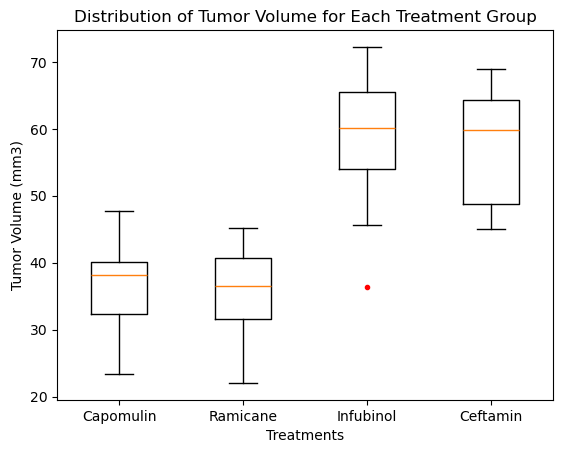

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a box plot
plt.boxplot(tumor_vol, labels=treatments, sym='r.')

# Set plot labels and title
plt.xlabel('Treatments')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')


# Display the plot
plt.show()

## Line and Scatter Plots

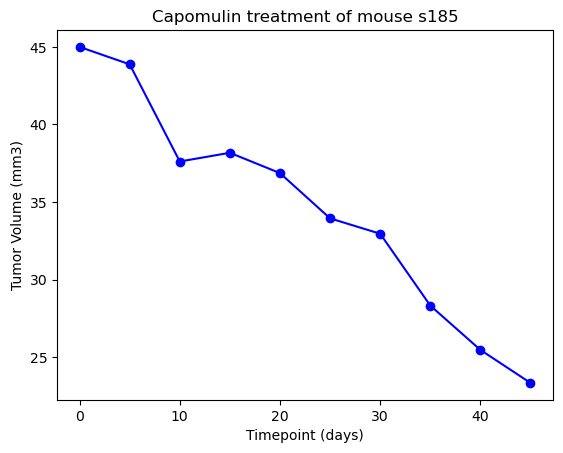

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_mouse = clean_data_df.loc[clean_data_df["Mouse ID"] == "s185"]

Capomulin_time = Capomulin_mouse["Timepoint"]
Capomulin_volume = Capomulin_mouse["Tumor Volume (mm3)"]



x_axis = Capomulin_mouse["Timepoint"]
tumor_size = Capomulin_mouse["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.plot(x_axis, tumor_size, marker='o', color='b')


plt.title("Capomulin treatment of mouse s185")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


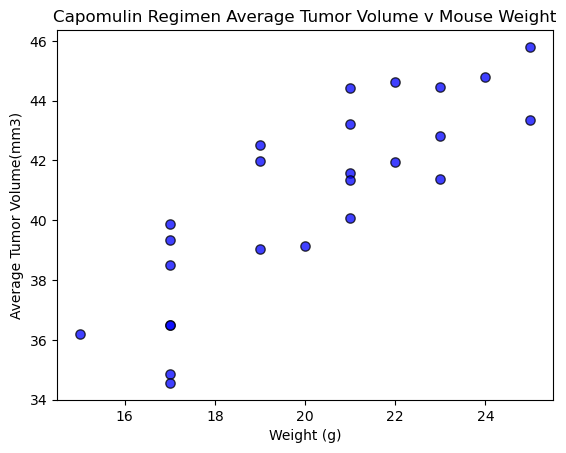

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

Capomulin_DataFrame = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Capomulin", :]
capm_vol = Capomulin_DataFrame.groupby(["Mouse ID"])[["Weight (g)", "Tumor Volume (mm3)"]].mean()

plt.scatter(capm_vol["Weight (g)"], capm_vol["Tumor Volume (mm3)"], marker="o", facecolors="blue", edgecolors="black",
            s=45, alpha=0.75)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume(mm3)")
plt.title("Capomulin Regimen Average Tumor Volume v Mouse Weight")
plt.show()




## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


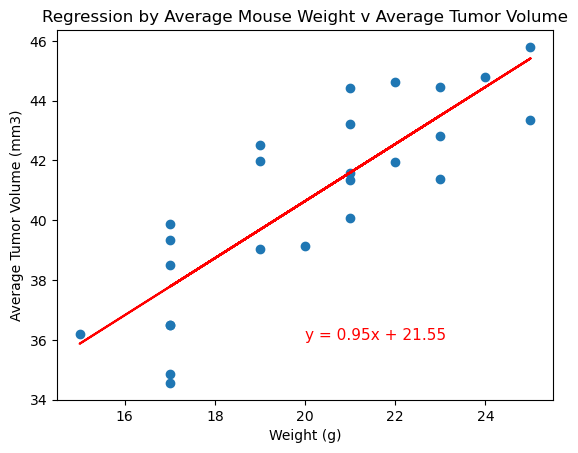

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_coefficient = st.pearsonr(capm_vol["Weight (g)"], capm_vol["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_coefficient[0], 2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capm_vol["Weight (g)"], capm_vol["Tumor Volume (mm3)"])

#y = mx + b
regress_values = capm_vol["Weight (g)"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(capm_vol["Weight (g)"], capm_vol["Tumor Volume (mm3)"], color="tab:blue")
plt.plot(capm_vol["Weight (g)"], regress_values, color="red")
plt.annotate(line_eq,(20,36),fontsize=11,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Regression by Average Mouse Weight v Average Tumor Volume")
plt.show()